<a href="https://colab.research.google.com/github/ihagoSantos/image-analysis-and-computer-vision/blob/main/content_based_image_retrieval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Recuperação de Inforamção com base no Conteúdo Visual
## Descrição de Imagens
Descritor representa a propriedade de uma imagemm. O descritor deve ser ivariante a rotação, escala, etc.\
Exemplo de uma forma (muito simples) de se obter uma representação numérica sobre a imagem por meio de histograma de cor.

In [25]:
!pip install opencv-contrib-python --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.1/69.1 MB 10.8 MB/s eta 0:00:00
  Attempting uninstall: opencv-contrib-python
    Found existing installation: opencv-contrib-python 4.10.0.84
    Uninstalling opencv-contrib-python-4.10.0.84:
      Successfully uninstalled opencv-contrib-python-4.10.0.84


In [1]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


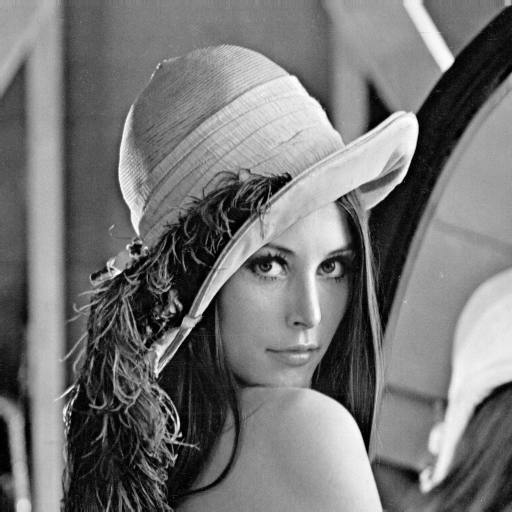

In [3]:
# Lê imagem do google drive
base_url = '/content/drive/My Drive/Pós Graduação PUC Minas/12 - Análise de Imagem e Visão Computacional/Unidade 2/pratica'
img = cv2.imread(f"{base_url}/lena.jpg", 0) # 0 indica que a imagem será lida em escala de cinza
cv2_imshow(img)

In [4]:
hist, bins = np.histogram(img.ravel(), 256, [0, 256])

In [5]:
bins

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
        88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
        99., 100., 101., 102., 103., 104., 105., 106., 107., 108., 109.,
       110., 111., 112., 113., 114., 115., 116., 117., 118., 119., 120.,
       121., 122., 123., 124., 125., 126., 127., 128., 129., 130., 131.,
       132., 133., 134., 135., 136., 137., 138., 139., 140., 141., 142.,
       143., 144., 145., 146., 147., 148., 149., 15

In [6]:
hist

array([ 154,  260,  415,  689,  934, 1129, 1151, 1279, 1397, 1445, 1532,
       1523, 1562, 1592, 1580, 1572, 1603, 1575, 1480, 1529, 1469, 1405,
       1336, 1307, 1269, 1190, 1204, 1083,  995, 1037,  904,  919,  855,
        794,  721,  687,  644,  697,  657,  620,  604,  569,  571,  548,
        592,  586,  596,  601,  599,  600,  591,  607,  667,  620,  661,
        664,  626,  673,  705,  689,  708,  670,  673,  672,  689,  693,
        704,  726,  745,  729,  764,  838,  873,  820,  851,  870,  883,
        999,  997, 1022, 1145, 1123, 1265, 1355, 1487, 1531, 1544, 1523,
       1419, 1406, 1477, 1403, 1262, 1231, 1205, 1247, 1146, 1063, 1072,
       1047, 1039, 1026, 1003, 1054, 1104, 1061,  967, 1057, 1073, 1110,
       1171, 1156, 1135, 1192, 1232, 1339, 1325, 1359, 1532, 1613, 1606,
       1729, 1829, 1761, 1860, 1866, 1868, 1832, 1772, 1681, 1647, 1511,
       1454, 1393, 1411, 1515, 1497, 1547, 1525, 1720, 1755, 1898, 1851,
       1842, 1888, 1923, 1864, 1802, 1794, 1789, 17

# Plotting Histograms
## Features Globais

In [6]:
from matplotlib import pyplot as plt

<ipython-input-7-e8c4b1dad528>:1: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(img.ravel(), 256, [0, 256])


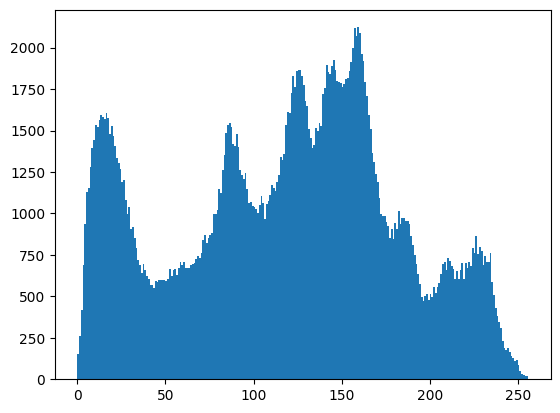

In [7]:
plt.hist(img.ravel(), 256, [0, 256])
plt.show()

## Histograma de cor na imagem de três canais

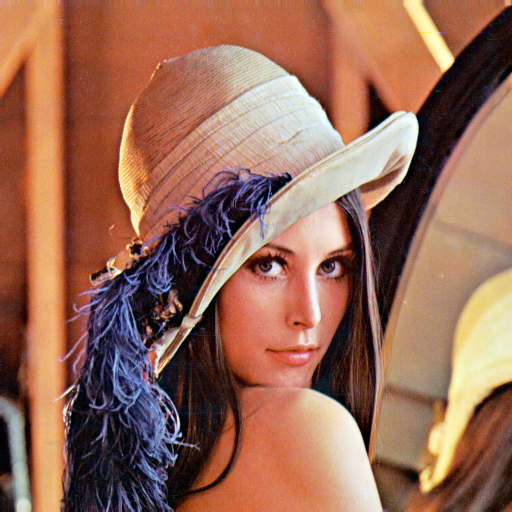

In [8]:
img_bgr = cv2.imread(f"{base_url}/lena.jpg")
cv2_imshow(img_bgr)

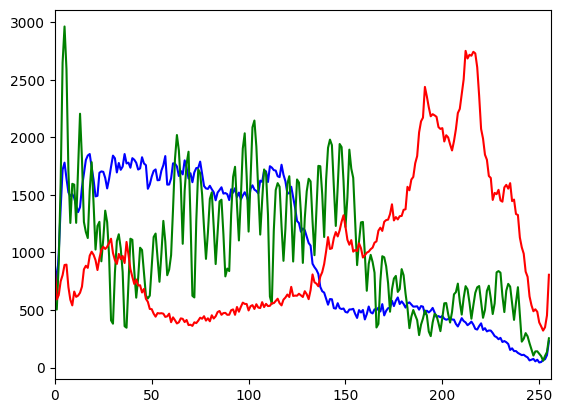

In [9]:
color = ('b', 'g', 'r') # canais de cores
for i,c in enumerate(color):
  hist = cv2.calcHist([img_bgr], [i], None, [256], [0, 256])
  plt.plot(hist, color=c)
  plt.xlim([0, 256])
plt.show()

# Feature Detection and Description

### Feature Locais
Padrão que se difere da vizinhança local. \
Pontos de interesse como:
- cantos (corners)
- regiões
- etc.

## Binary Robust Independent Elementary Features (BRIEF)
É importante dizer que essa não é uma estratégia para detecção de objetos em uma imagem, pois ela não é baseada em learning.
Ela apenas destaca pontos de interesse. \
Ele utiliza uma técnica de janela deslizante (semelhante ao SIFT)

In [12]:
# Para imprimir a matriz completa, descomentar as duas linhas abaixo
# import sys
# np.set_printoptions(threshold=sys.maxsize)

In [10]:
from cv2.xfeatures2d import StarDetector_create, BriefDescriptorExtractor_create

In [11]:
# BRIEF não possui detector de pontos de interesse

# Initiate STAR detector
star = StarDetector_create()

# Initiate BRIEF detector
brief = BriefDescriptorExtractor_create()

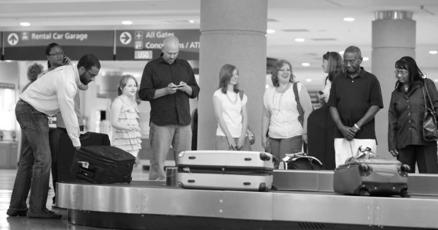

In [12]:
img_baggage = cv2.imread(f"{base_url}/baggage_claim.jpg", 0)
cv2_imshow(img_baggage)

In [13]:
# find key points with STAR
kp = star.detect(img_baggage, None)

# compute the descriptios with BRIEF
kp, feat = brief.compute(img_baggage, kp)

print(len(kp))
print(feat.shape)
print(feat)

141
(141, 32)
[[ 76 202 129 ...  34 255 131]
 [224 246  71 ...  56 166 212]
 [ 73   6  12 ... 108 194 231]
 ...
 [228 111  43 ... 221 143  96]
 [224 104  79 ... 216 207  71]
 [  8 130 132 ...  40 174 213]]


## Oriented FAST and Rotated BRIEF (ORB)
Evolução do BRIEF, mas ele possui uma vantagem em relação ao BRIEF que, ele detecta e já faz a extração dos pontos de interesse.

In [14]:
# Initialize ORB detector
orb = cv2.ORB_create()

# Find the keypoints and descriptors with SIFT
kp1, des1 = orb.detectAndCompute(img_baggage, None)

print(np.shape(des1))
print(des1)

(471, 32)
[[ 77 225 172 ... 195 157  98]
 [248 176  61 ... 136 198  35]
 [131  36 172 ... 112 226 166]
 ...
 [ 80 247  27 ...  58 211  43]
 [228 111 184 ... 123 214 203]
 [ 88 128  83 ... 163  36  32]]


## Matching de features locais entre duas imagens

In [15]:
import imutils

In [16]:
# create BFMatcher object
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)


In [17]:
img1 = cv2.imread(f"{base_url}/baggage_claim.jpg", 0)
img2 = cv2.imread(f"{base_url}/baggage_claim.jpg", 0)

# rotate image 180°
rotated = imutils.rotate(img2, 180)
img2 = rotated

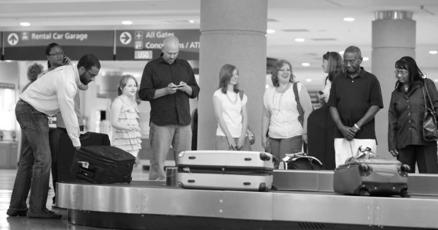

In [18]:
cv2_imshow(img1)

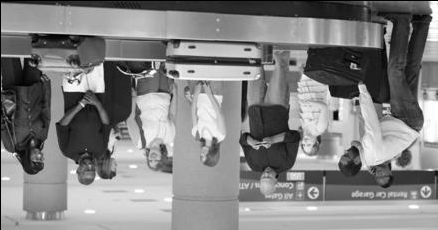

In [19]:
cv2_imshow(img2)

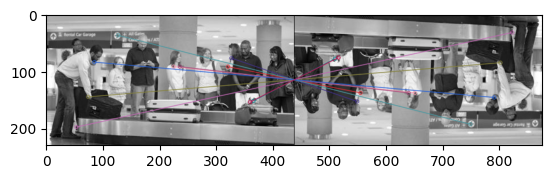

(<matplotlib.image.AxesImage at 0x7a2d714c2bd0>, None)

In [22]:
# find the keypoings and descriptiors with SIFT
kp1, desc1 = orb.detectAndCompute(img1, None)
kp2, desc2 = orb.detectAndCompute(img2, None)

# Match descriptios
matches = bf.match(desc1, desc2)

# sort them in the order of their distances.
matches = sorted(matches, key = lambda x:x.distance)

# draw first 10 matches
img3 = cv2.drawMatches(img1, kp1, img2, kp2, matches[:10], None, flags=2)

plt.imshow(img3), plt.show()

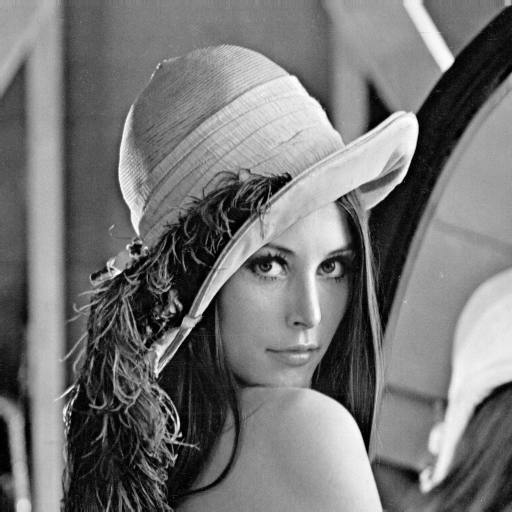

In [23]:
cv2_imshow(img)

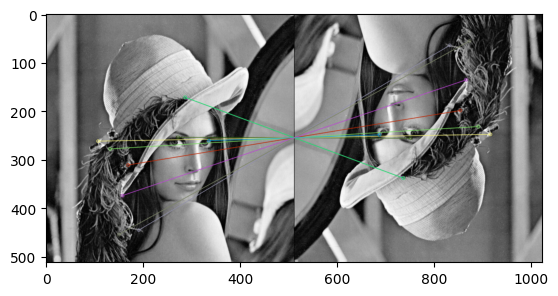

(<matplotlib.image.AxesImage at 0x7a2d6f6d2210>, None)

In [24]:
# rotate image 180°
img_lena = img
rotated = imutils.rotate(img_lena, 180)
img_lena_rotated = rotated

# find the keypoints and descriptors with SIFT
kp1, desc1 = orb.detectAndCompute(img_lena, None)
kp2, desc2 = orb.detectAndCompute(img_lena_rotated, None)

# Match descriptors
matches = bf.match(desc1, desc2)

# Sort them in the order of their distances
matches = sorted(matches, key = lambda x:x.distance)

# Draw the first 10 matches
img_lena_matches = cv2.drawMatches(img_lena, kp1, img_lena_rotated, kp2, matches[:10], None, flags=2)

plt.imshow(img_lena_matches), plt.show()
